# Nural Network
A neural network is a method in artificial intelligence that teaches computers to process data in a way that is inspired by the human brain. It is a type of machine learning process, called deep learning, that uses interconnected nodes or neurons in a layered structure that resembles the human brain. It creates an adaptive system that computers use to learn from their mistakes and improve continuously. Thus, artificial neural networks attempt to solve complicated problems, like summarizing documents or recognizing faces, with greater accuracy.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

Problem Statement:-PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [2]:
data=pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### Data Exploration

In [ ]:
data.shape

(517, 31)

In [ ]:
pd.set_option('display.max_columns', None)
data.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [ ]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [ ]:
#Checking for missing or null values
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
#Checking for duplicate rows in tha data

data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [ ]:
#month column

data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [ ]:
#day column

data['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [ ]:
data['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

Comment:<br>
* Most of the forest fires happen in the month of august and september.
* Small forest fires are more in number than large forest fires mostly happens in sundays and fridays

In [ ]:
#Statistical description of the data
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
px.bar(x=data['size_category'])

Comment:-<br>

This is the binary classification problem.

In [ ]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [ ]:
data.drop('month',inplace=True,axis=1)
data.drop('day',inplace=True,axis=1)

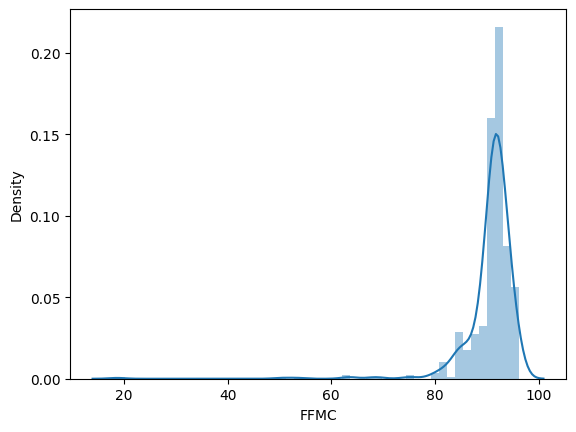

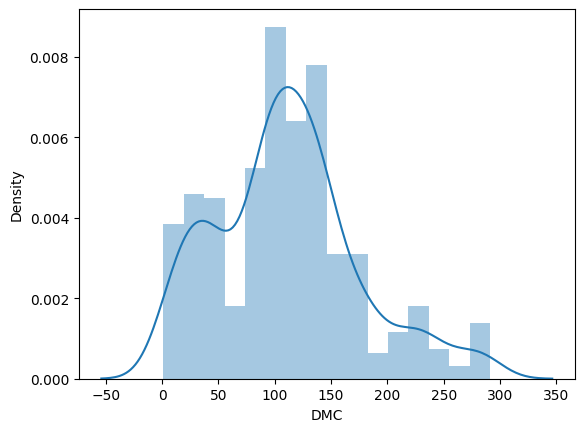

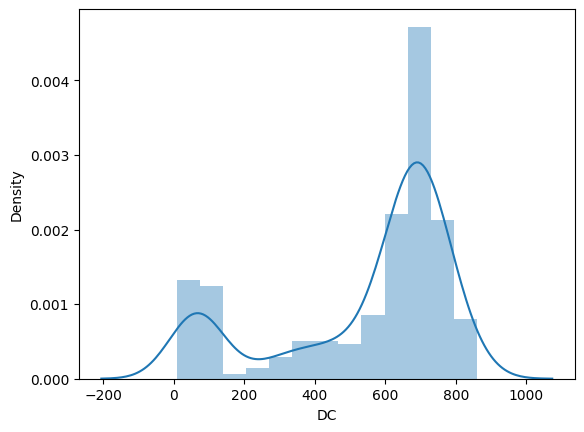

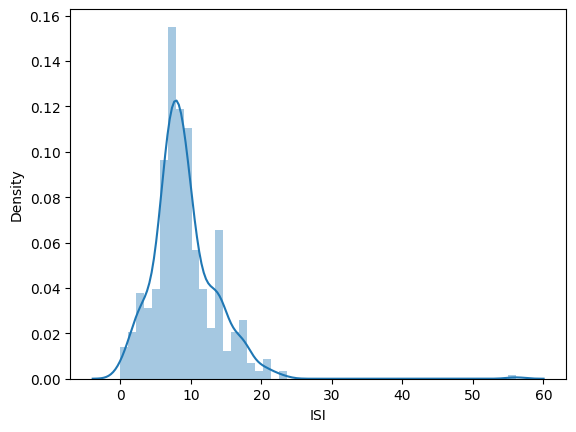

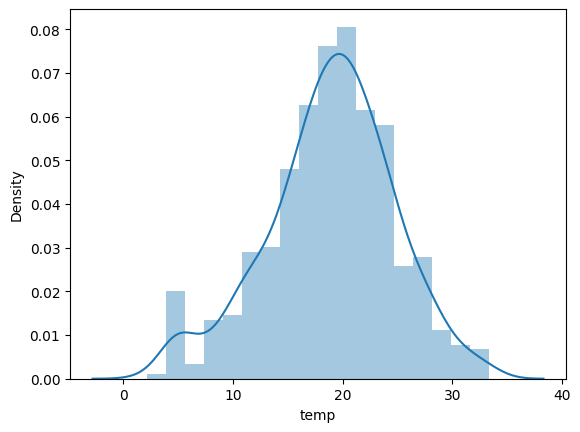

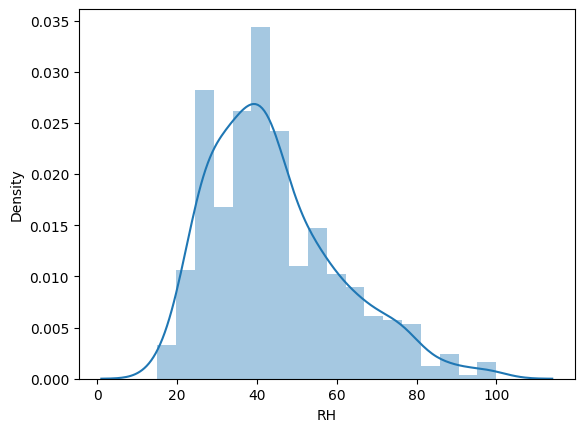

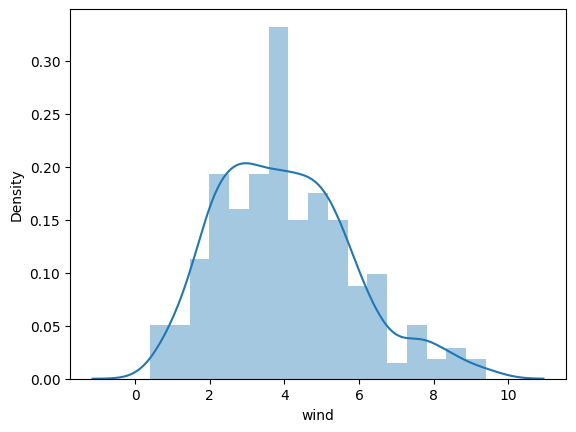

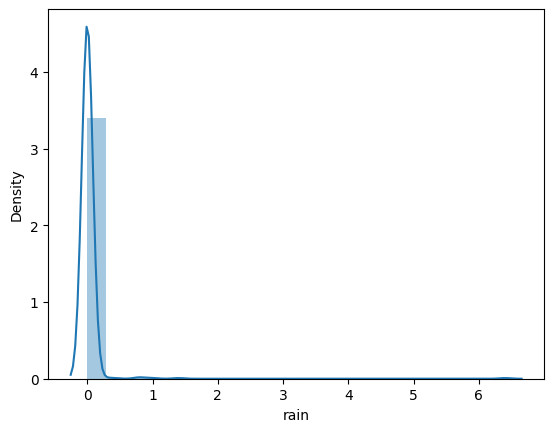

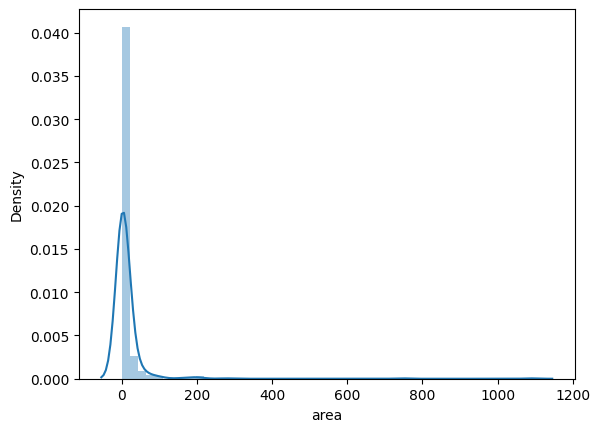

In [ ]:
columns=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']
for i in columns:
  plt.figure()
  sns.distplot(data[i])

In [ ]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,-0.059396,-0.019637,-0.089517,0.071730,0.011225,0.093908,-0.117199,0.228103,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,-0.107921,-0.003653,0.025355,0.087672,0.000016,0.017939,-0.197543,0.497928,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,-0.052993,-0.035189,-0.001431,0.051859,0.028368,0.024803,-0.268211,0.279361,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,-0.158601,-0.038585,-0.003243,-0.022406,0.068610,0.125415,-0.106478,0.334639,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,-0.136529,0.034899,0.014403,0.051432,0.035630,0.090580,-0.157051,0.351404,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,0.009376,-0.023869,0.136220,-0.123061,-0.014211,-0.087508,0.021235,0.054761,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,-0.063881,-0.063799,0.027981,-0.062553,0.053396,-0.019965,0.048266,0.028577,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,-0.029945,-0.032271,-0.017872,-0.026798,0.139311,-0.020744,-0.009752,0.093101,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,-0.021206,0.087868,-0.020463,0.020121,-0.001333,-0.011452,-0.008280,-0.004187,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,-0.181293,-0.195372,-0.210462,-0.162237,-0.166728,-0.151487,-0.019140,-0.100837,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


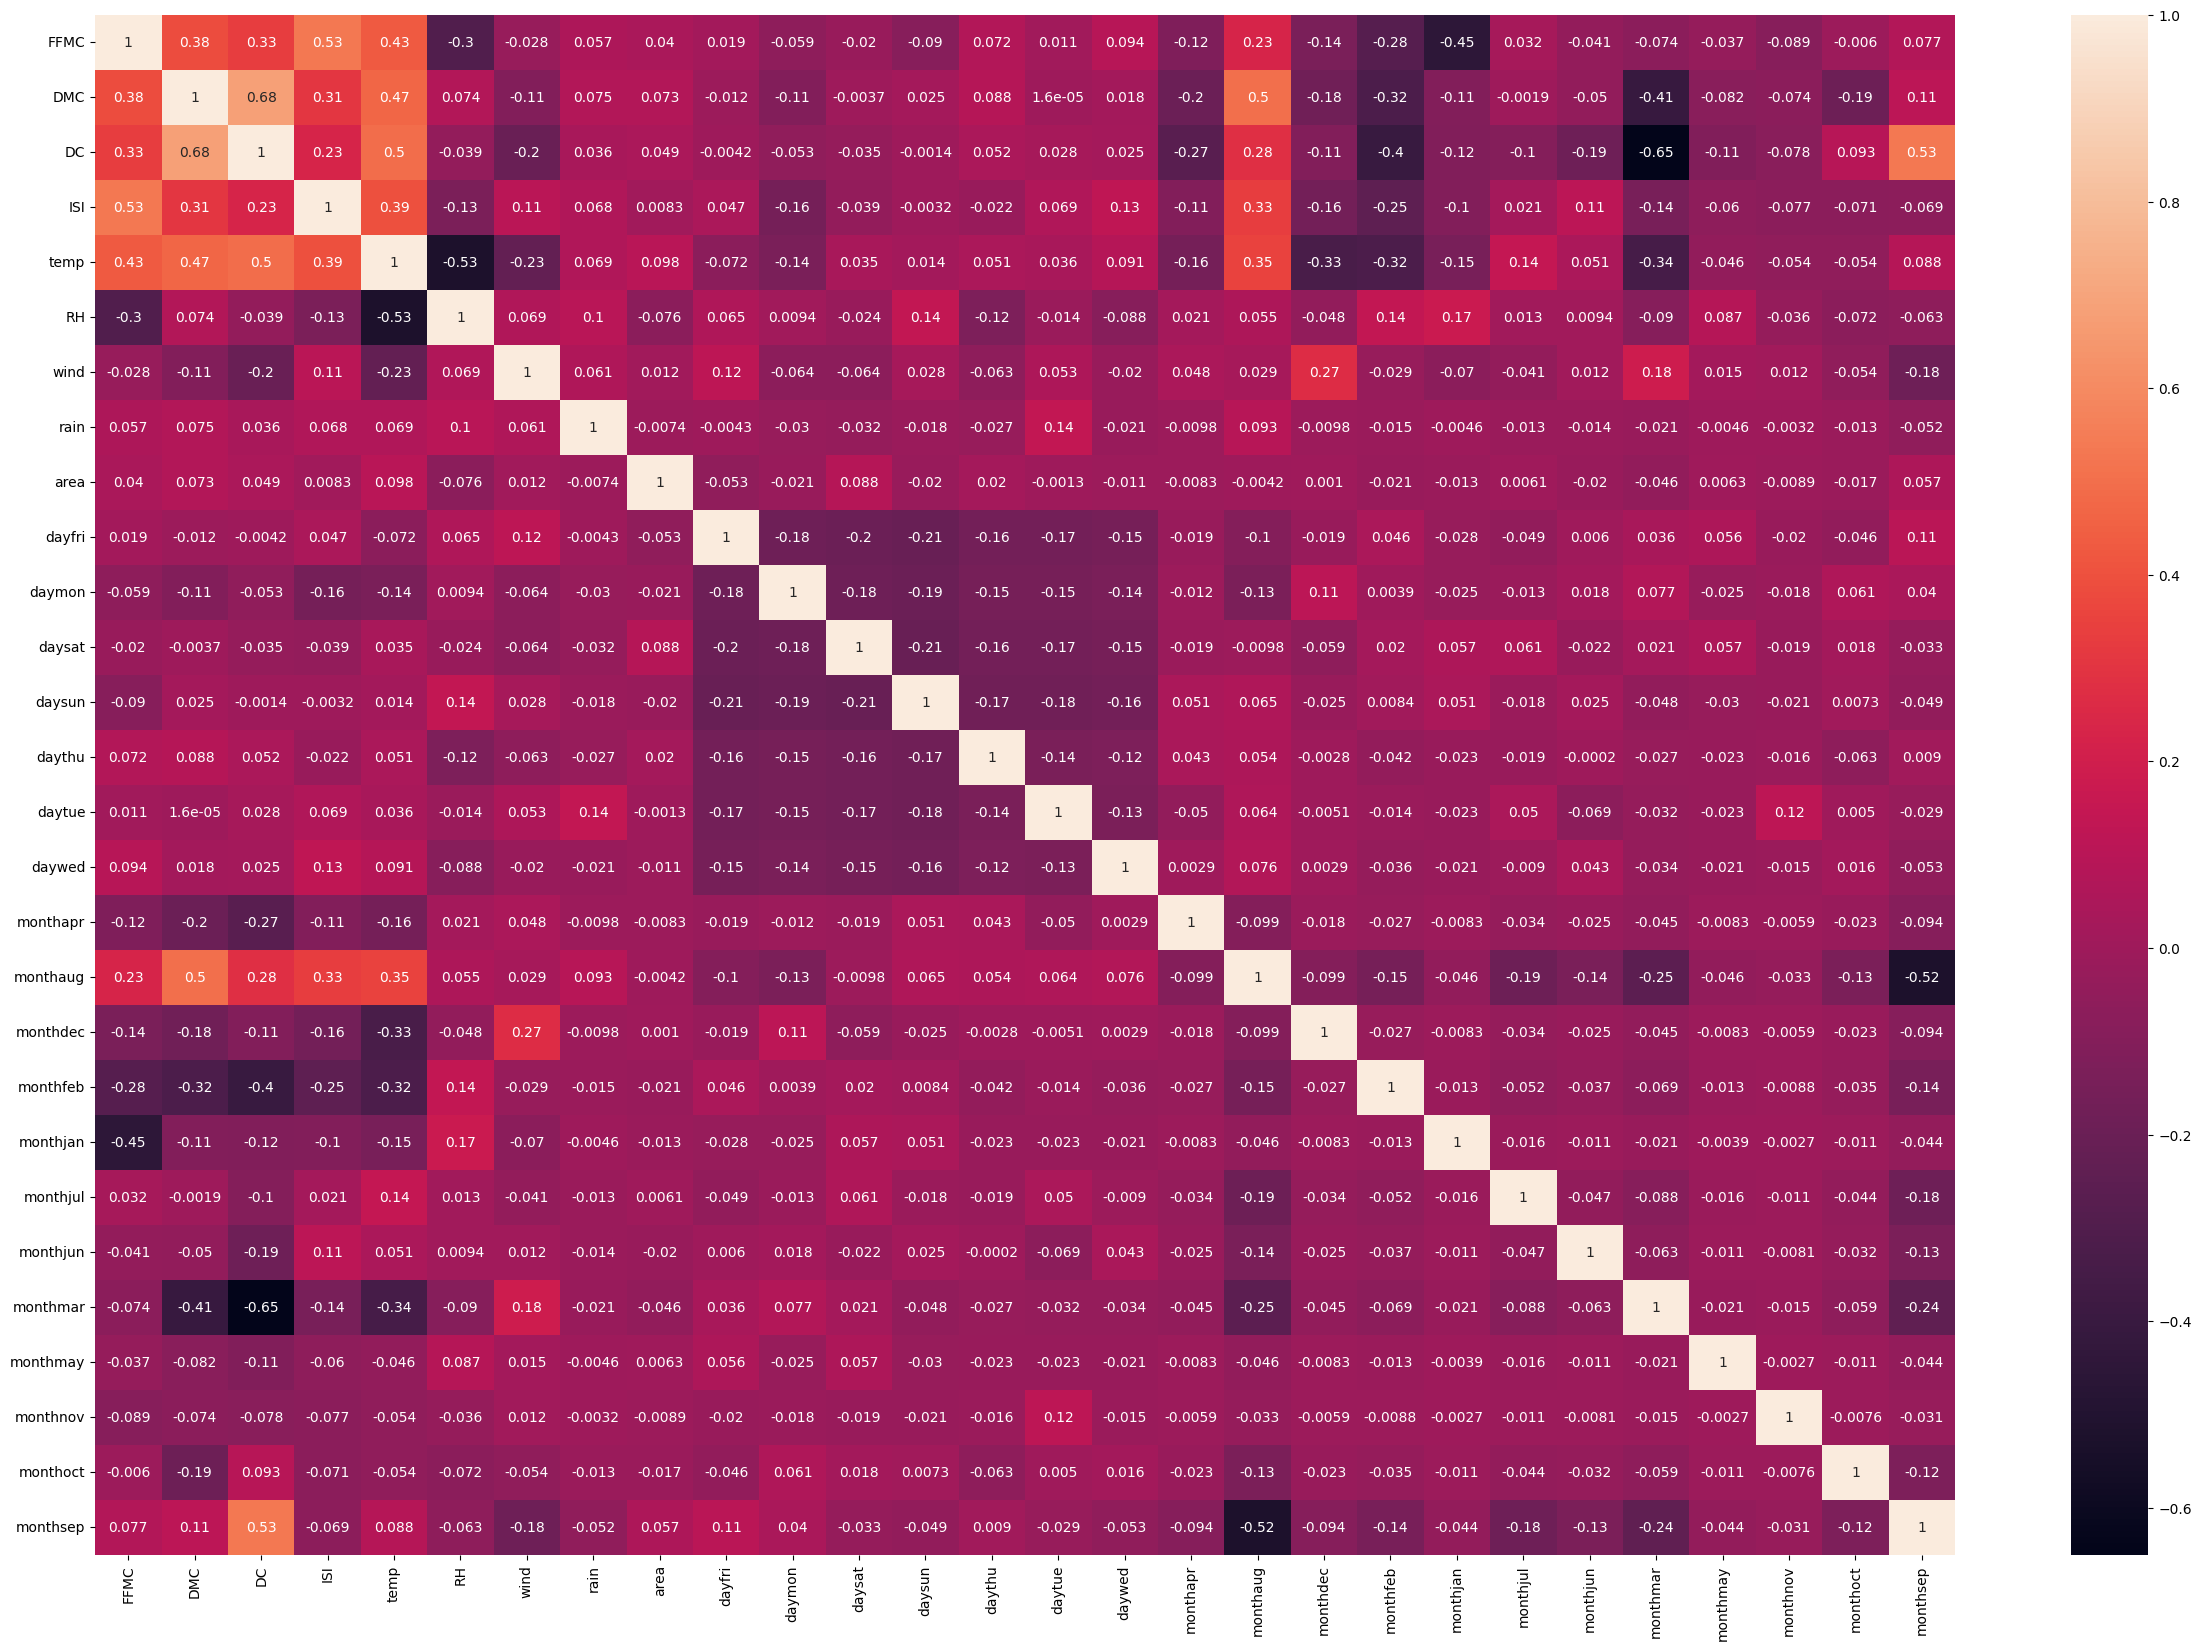

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)
plt.show();

In [ ]:
data.shape

(517, 29)

In [ ]:
label_encoder=LabelEncoder()
data['size_category']=label_encoder.fit_transform(data['size_category'])
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:

X=data.iloc[:,:-1]       #Featues
Y=data.iloc[:,-1]         #Target variable

print(X.shape)
print(Y.shape)

(517, 28)
(517,)


In [ ]:
X.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep'],
      dtype='object')

### Data Pre-Processing
Feature Engineering

In [ ]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(X)
scaled_features

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,Y,test_size=0.2,random_state=10)

### Nural Network Model

In [ ]:
model=tf.keras.models.Sequential()
model

> Input Layer
* No.of features=30.
* Number of nodes in an input layer should be 1.5*30 i.e., 45.

> Hidden Layers


> Output Layer

In [ ]:
28*1.5

42.0

In [ ]:

model.add(tf.keras.layers.Dense(42,input_dim=28,activation='sigmoid'))    #input layer
model.add(tf.keras.layers.Dense(30,activation='tanh'))
model.add(tf.keras.layers.Dense(1,activation='ReLU'))

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 42)                1218      
                                                                 
 dense_1 (Dense)             (None, 30)                1290      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2539 (9.92 KB)
Trainable params: 2539 (9.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Compile Model

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics='accuracy')

In [ ]:
#Fit the model

history=model.fit(X,Y,validation_split=0.2,epochs=20,batch_size=10)

Epoch 1/20
42/42 [==============================] - 1s 8ms/step - loss: 11.3913 - accuracy: 0.2615 - val_loss: 10.8271 - val_accuracy: 0.2981
Epoch 2/20
42/42 [==============================] - 0s 3ms/step - loss: 11.3913 - accuracy: 0.2615 - val_loss: 10.8271 - val_accuracy: 0.2981
Epoch 3/20
42/42 [==============================] - 0s 3ms/step - loss: 11.3913 - accuracy: 0.2615 - val_loss: 10.8271 - val_accuracy: 0.2981
Epoch 4/20
42/42 [==============================] - 0s 3ms/step - loss: 11.3913 - accuracy: 0.2615 - val_loss: 10.8271 - val_accuracy: 0.2981
Epoch 5/20
42/42 [==============================] - 0s 3ms/step - loss: 11.3913 - accuracy: 0.2615 - val_loss: 10.8271 - val_accuracy: 0.2981
Epoch 6/20
42/42 [==============================] - 0s 3ms/step - loss: 11.3913 - accuracy: 0.2615 - val_loss: 10.8271 - val_accuracy: 0.2981
Epoch 7/20
42/42 [==============================] - 0s 3ms/step - loss: 11.3913 - accuracy: 0.2615 - val_loss: 10.8271 - val_accuracy: 0.2981
Epoch 

In [ ]:
# Model Evaluation
score=model.evaluate(X,Y)
print('%s: %.2f%%' %(model.metrics_names[1],score[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 11.2778 - accuracy: 0.2689
accuracy: 26.89%


In [ ]:
#visualizing training history

model.history.history.keys()

dict_keys([])

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

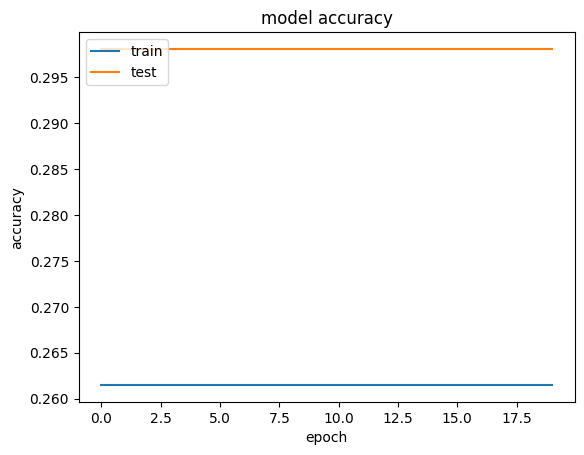

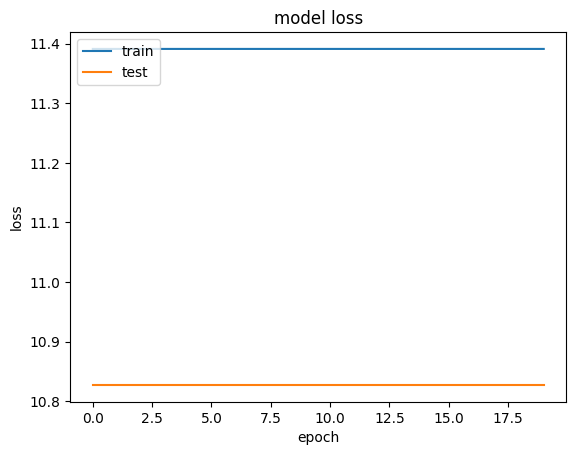

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. <br>
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.<br>



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.
<br>


Attribute Information:<br>

The explanations of sensor measurements and their brief statistics are given below.<br>

* Variable (Abbr.) Unit Min Max Mean
* Ambient temperature (AT) C â€“6.23 37.10 17.71
* Ambient pressure (AP) mbar 985.85 1036.56 1013.07
* Ambient humidity (AH) (%) 24.08 100.20 77.87
* Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
* Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
* Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
* Turbine after temperature (TAT) C 511.04 550.61 546.16
* Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
* Turbine energy yield (TEY) MWH 100.02 179.50 133.51
* Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
* Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [ ]:
!pip install scikeras

In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,KFold
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop

In [ ]:
tf.__version__

'2.14.0'

In [ ]:
data=pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [ ]:
data=data.iloc[:,[0,1,2,7]]
data

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72
...,...,...,...,...
15034,9.0301,1005.6,98.460,111.61
15035,7.8879,1005.9,99.093,111.78
15036,7.2647,1006.3,99.496,110.19
15037,7.0060,1006.8,99.008,110.74


In [ ]:
data['TEY']=data['TEY'].apply(lambda x:1 if x<150 else 0)

In [ ]:
data

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,1
1,6.7850,1008.4,97.118,1
2,6.8977,1008.8,95.939,1
3,7.0569,1009.2,95.249,1
4,7.3978,1009.7,95.150,1
...,...,...,...,...
15034,9.0301,1005.6,98.460,1
15035,7.8879,1005.9,99.093,1
15036,7.2647,1006.3,99.496,1
15037,7.0060,1006.8,99.008,1


In [ ]:
data.isnull().sum()

AT     0
AP     0
AH     0
TEY    0
dtype: int64

In [ ]:
data.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,0.811224
std,7.574323,6.41076,13.793439,0.391343
min,0.522300,985.85000,30.344000,0.000000
25%,11.408000,1008.90000,69.750000,1.000000
50%,18.186000,1012.80000,82.266000,1.000000
75%,23.862500,1016.90000,90.043500,1.000000
max,34.929000,1034.20000,100.200000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 470.1 KB


In [ ]:
corr=data.corr()
corr


,AT,AP,AH,TEY
AT,1.000000,-0.412953,-0.549432,0.302807
AP,-0.412953,1.000000,0.042573,-0.165185
AH,-0.549432,0.042573,1.000000,-0.004404
TEY,0.302807,-0.165185,-0.004404,1.000000


<Axes: >

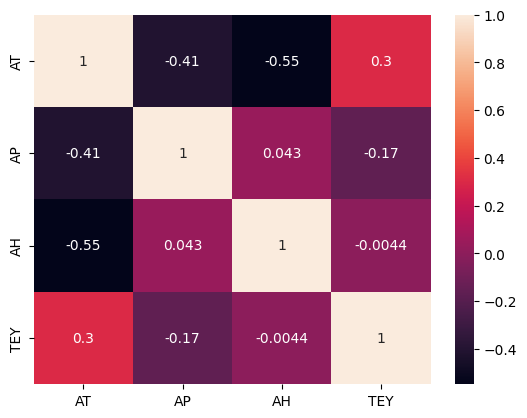

In [ ]:
import seaborn as sns
sns.heatmap(corr,annot=True)

<Axes: xlabel='TEY', ylabel='count'>

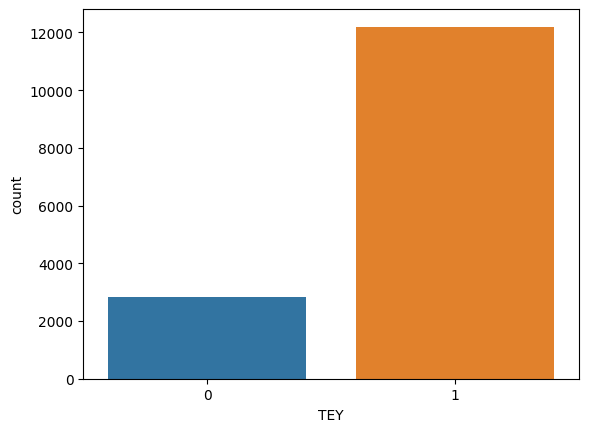

In [ ]:
sns.countplot(x=data['TEY'])

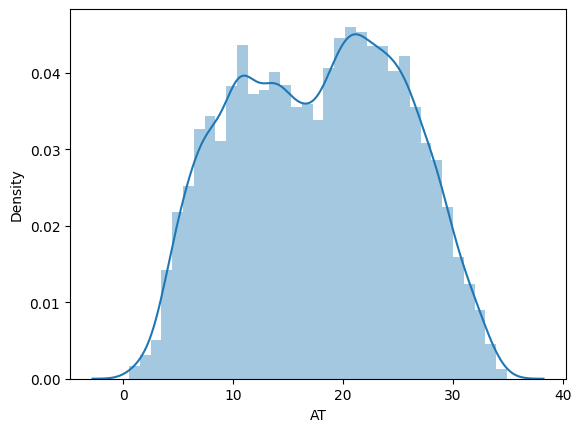

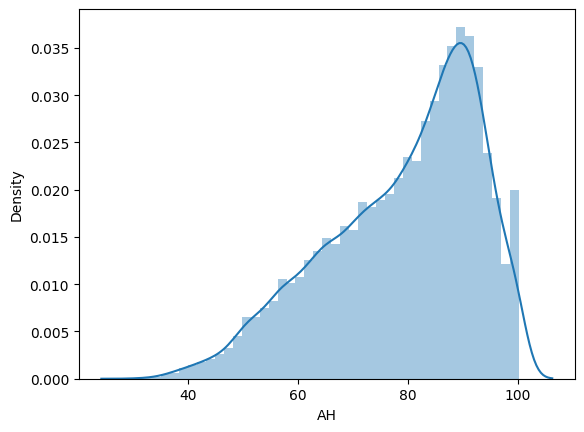

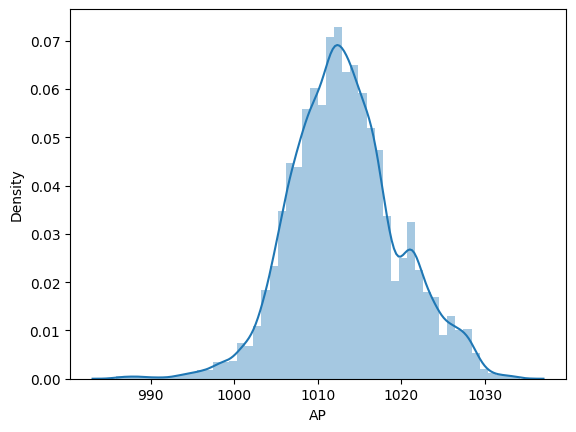

In [ ]:
columns=['AT','AH','AP']
for i in columns:
  plt.show()
  sns.distplot(data[i])

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
scale=MinMaxScaler()
X_train=scale.fit_transform(x_train)
X_train

array([[0.66311794, 0.53050672, 0.80217877],
       [0.66611154, 0.41054809, 0.56171267],
       [0.88002337, 0.48086867, 0.45928768],
       ...,
       [0.93152496, 0.43329886, 0.26003493],
       [0.53939204, 0.52843847, 0.51471599],
       [0.16463945, 0.6918304 , 0.69563101]])

In [ ]:
x_test=scale.fit_transform(x_test)
x_test

array([[0.69273707, 0.54165774, 0.57332465],
       [0.50799975, 0.51381452, 0.82565142],
       [0.16620606, 0.79438852, 0.75283725],
       ...,
       [0.86288518, 0.49453845, 0.57036533],
       [0.0421889 , 0.76226173, 0.77828744],
       [0.30778364, 0.69586635, 0.86759984]])

In [ ]:
from tensorflow.keras.optimizers import Adam,RMSprop


In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer ='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  optmizer=RMSprop(0.03)
  model.compile(loss='mean_squared_error',metrics='accuracy',optimizer=optmizer)
  return model


In [ ]:
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20]
epochs=[50,100,150,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.809 total time= 1.4min
[CV 2/5] END ..........batch_size=10, epochs=50;, score=0.795 total time= 1.5min
[CV 3/5] END ..........batch_size=10, epochs=50;, score=0.829 total time= 1.5min
[CV 4/5] END ..........batch_size=10, epochs=50;, score=0.804 total time= 1.4min
[CV 5/5] END ..........batch_size=10, epochs=50;, score=0.799 total time= 1.2min
[CV 1/5] END .........batch_size=10, epochs=100;, score=0.809 total time= 2.4min
[CV 2/5] END .........batch_size=10, epochs=100;, score=0.795 total time= 2.4min
[CV 3/5] END .........batch_size=10, epochs=100;, score=0.829 total time= 2.4min
[CV 4/5] END .........batch_size=10, epochs=100;, score=0.804 total time= 2.4min
[CV 5/5] END .........batch_size=10, epochs=100;, score=0.799 total time= 2.4min
[CV 1/5] END .........batch_size=10, epochs=150;, score=0.809 total time= 4.4min
[CV 2/5] END .........batch_size=10, epochs=150;,

In [ ]:
print(result.best_score_,result.best_params_)

0.8069735378840683 {'batch_size': 10, 'epochs': 50}


In [ ]:
def create_model(dropout_rate,learning_rate):
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8,kernel_initializer = 'uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=10,epochs=20,learning_rate=[0.001,0.01],dropout_rate=[0.1,0.3])
#dropout_rate=[0.1,0.3]
#learning_rate=[0.001,0.01]
param_grid=dict(dropout_rate=[0.1,0.3],learning_rate=[0.001,0.01])
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.809 total time=  42.3s
[CV 2/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.795 total time=  42.2s
[CV 3/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.829 total time=  33.4s
[CV 4/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.804 total time=  42.9s
[CV 5/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.799 total time=  33.5s
[CV 1/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.809 total time=  42.6s
[CV 2/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.795 total time=  32.1s
[CV 3/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.829 total time=  31.7s
[CV 4/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.804 total time=  42.3s
[CV 5/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.799 total time=  32.3s
[CV 1/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.809 total time=  32.0s
[CV 2/5] END dropout_

In [ ]:
print(result.best_params_,result.best_score_)

{'dropout_rate': 0.1, 'learning_rate': 0.001} 0.8069735378840683


In [ ]:
def create_model(activation_Function,init):
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer=init,activation=activation_Function))
  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,activation_Function=['relu','tanh','softmax','linear'],init=['zero','uniform','normal'])
param_grid=dict(activation_Function=['relu','tanh','softmax','linear'],init=['zero','uniform','normal'])
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END activation_Function=relu, init=zero;, score=0.191 total time= 1.3min
[CV 2/5] END activation_Function=relu, init=zero;, score=0.205 total time= 1.4min
[CV 3/5] END activation_Function=relu, init=zero;, score=0.171 total time= 1.3min
[CV 4/5] END activation_Function=relu, init=zero;, score=0.196 total time= 1.4min
[CV 5/5] END activation_Function=relu, init=zero;, score=0.201 total time= 1.4min
[CV 1/5] END activation_Function=relu, init=uniform;, score=0.809 total time= 1.4min
[CV 2/5] END activation_Function=relu, init=uniform;, score=0.795 total time= 1.4min
[CV 3/5] END activation_Function=relu, init=uniform;, score=0.829 total time= 1.3min
[CV 4/5] END activation_Function=relu, init=uniform;, score=0.804 total time= 1.4min
[CV 5/5] END activation_Function=relu, init=uniform;, score=0.799 total time= 1.4min
[CV 1/5] END activation_Function=relu, init=normal;, score=0.809 total time= 1.4min
[CV 2/5] END activat

In [ ]:
print(result.best_params_,result.best_score_)

{'activation_Function': 'linear', 'init': 'normal'} 0.807258573513522


In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(8,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='uniform',activation='tanh'))
  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50)
model.fit(X_train,y_train)

Epoch 1/50
1053/1053 [==============================] - 4s 3ms/step - loss: 0.9375 - accuracy: 0.6531
Epoch 2/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4812 - accuracy: 0.8055
Epoch 3/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4626 - accuracy: 0.8031
Epoch 4/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4530 - accuracy: 0.8009
Epoch 5/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4499 - accuracy: 0.8001
Epoch 6/50
1053/1053 [==============================] - 3s 3ms/step - loss: 0.4490 - accuracy: 0.8005
Epoch 7/50
1053/1053 [==============================] - 3s 3ms/step - loss: 0.4436 - accuracy: 0.8027
Epoch 8/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4422 - accuracy: 0.8009
Epoch 9/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4451 - accuracy: 0.8013
Epoch 10/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.443

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7c05804c8700>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

In [ ]:
y_pred_train=model.predict(X_train)

1053/1053 [==============================] - 2s 2ms/step


In [ ]:
y_pred_test=model.predict(x_test)

452/452 [==============================] - 1s 2ms/step


In [ ]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.56      0.05      0.09      2032
           1       0.81      0.99      0.89      8495

    accuracy                           0.81     10527
   macro avg       0.69      0.52      0.49     10527
weighted avg       0.77      0.81      0.74     10527



In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.57      0.06      0.11       807
           1       0.83      0.99      0.90      3705

    accuracy                           0.82      4512
   macro avg       0.70      0.53      0.51      4512
weighted avg       0.78      0.82      0.76      4512

